<a href="https://colab.research.google.com/github/Saipraneeth99/DeepLearning/blob/main/task3_3_3GenVflat2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchsummary import summary
import numpy as np

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081))])

train_dataset = torchvision.datasets.MNIST('mnist_data/', train=True, download=True, transform=transform)

# train_labels = train_dataset.targets.numpy()


test_dataset = torchvision.datasets.MNIST('mnist_data/', train=False, download=True, transform=transform)




In [12]:
# Define the DNN model
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
import torch.optim as optim
import matplotlib.pyplot as plt

class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

# Initialize the model, loss function, and optimizer


In [13]:
# trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True)
# testloader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [17]:
# i = 1
Main_Train_acc = []
Main_Test_acc = []
Main_Train_loss = []
Main_Test_loss = []
Main_Sensitivities = []
model = DNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.5)
for i in range(5):
  trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=32*(i+1), shuffle=True)
  testloader = torch.utils.data.DataLoader(test_dataset, batch_size=32*(i+1), shuffle=False)  
  train_losses = []
  train_accuracies = []
  test_losses = []
  test_accuracy = []
  sensitivities = []
  for epoch in range(5):
    total = 0
    correct = 0
    total_loss = 0
    for batch_idx, (images, labels) in enumerate(trainloader):
      optimizer.zero_grad()
      outputs = model(images)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      total_loss += loss.item() 
    train_losses.append(total_loss/total)
    train_accuracies.append(100* correct/total)
    
    correct = 0
    total = 0
    with torch.no_grad():
      losses= []
      total_loss = 0
      for data in testloader:
        images, labels = data
        outputs = model(images)
        loss = criterion(outputs, labels)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        total_loss += loss.item()
      test_accuracy.append(100 *correct/total)
      test_losses.append(total_loss/total)
      print("Model {} Training Done".format(i))
      gradAll = 0.0
      fNormAll = 0
      counter = 0
      for p in model.parameters():
        grad = 0.0
        if p.grad is not None:
          grad = p.grad
          fNorm = torch.linalg.norm(grad).numpy()
          fNormAll += fNorm
          counter += 1
      sensitivities.append((fNormAll / counter))
  Main_Train_acc.append(np.sum(train_accuracies)/len(train_accuracies))
  Main_Test_acc.append(np.sum(test_accuracy)/len(test_accuracy))
  Main_Train_loss.append(np.sum(train_losses)/len(train_losses))
  Main_Test_loss.append(np.sum(test_losses)/len(test_losses))
  Main_Sensitivities.append(np.sum(sensitivities)/len(sensitivities))
  print("Model {} Training Done".format(i))


Model 0 Training Done
Model 0 Training Done
Model 0 Training Done
Model 0 Training Done
Model 0 Training Done
Model 0 Training Done
Model 1 Training Done
Model 1 Training Done
Model 1 Training Done
Model 1 Training Done
Model 1 Training Done
Model 1 Training Done
Model 2 Training Done
Model 2 Training Done
Model 2 Training Done
Model 2 Training Done
Model 2 Training Done
Model 2 Training Done
Model 3 Training Done
Model 3 Training Done
Model 3 Training Done
Model 3 Training Done
Model 3 Training Done
Model 3 Training Done
Model 4 Training Done
Model 4 Training Done
Model 4 Training Done
Model 4 Training Done
Model 4 Training Done
Model 4 Training Done


In [6]:
test_losses = [0.3980478048324585, 0.5,0.6,0.7,0.8]
np.sum(test_losses)/len(test_losses)

0.5996095609664917

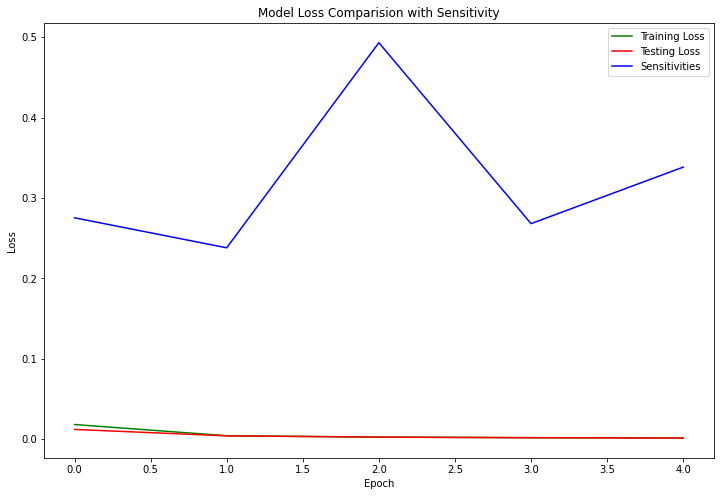

In [25]:
# Plot the loss over time
fig, ax = plt.subplots(figsize=(12, 8))
# ax.plot(losses)
ax.set_title('Model Loss Comparision with Sensitivity')
ax.plot(Main_Train_loss, 'g', label='Training Loss')
ax.plot(Main_Test_loss, 'r', label='Testing Loss')
ax.plot(sensitivities, 'b', label='Sensitivities')
ax.legend()

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.show()

[9.92]

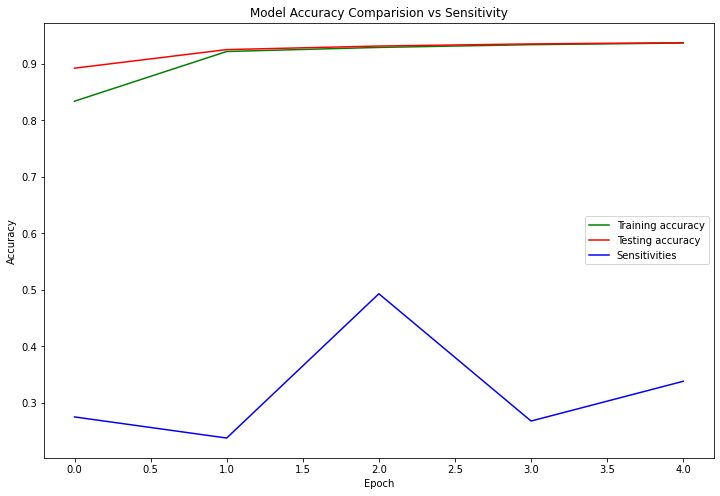

In [26]:
# Plot the loss over time
fig, ax = plt.subplots(figsize=(12, 8))
# ax.plot(losses)
ax.set_title('Model Accuracy Comparision vs Sensitivity')
ax.plot(np.array(Main_Train_acc)/100, 'g', label='Training accuracy')
ax.plot(np.array(Main_Test_acc)/100, 'r', label='Testing accuracy')
ax.plot(sensitivities, 'b', label='Sensitivities')
ax.legend()

ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
plt.show()